<a href="https://colab.research.google.com/github/jkfip/Combine_Cycl_Power_Plant/blob/master/Combine_Cycle_Power_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install scikit-learn==0.23.2 

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import pickle


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
#Read the dataset

In [4]:
df=pd.read_csv('/content/datasets_319676_644838_Folds5x2_pp (1).csv')

In [5]:
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [6]:
#Rename the columns name

In [7]:
df=df.rename(columns={'AT':'AmbientTempreature','V':'Exhaust Vaccume Speed','AP':'Ambient Pressure','RH':'Relative Humidity','PE':'Power Output'})
df

,AmbientTempreature,Exhaust Vaccume Speed,Ambient Pressure,Relative Humidity,Power Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [8]:
#check the nan value

In [9]:
df.isnull().sum()

AmbientTempreature       0
Exhaust Vaccume Speed    0
Ambient Pressure         0
Relative Humidity        0
Power Output             0
dtype: int64

In [10]:
#UNIVARIATE Analysis


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a26371ac8>,
      dtype=object)

<Figure size 7200x3600 with 0 Axes>

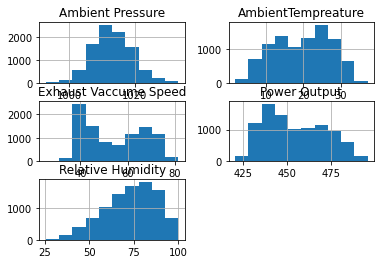

In [11]:
plt.figure(figsize=(100,50))
df.hist()

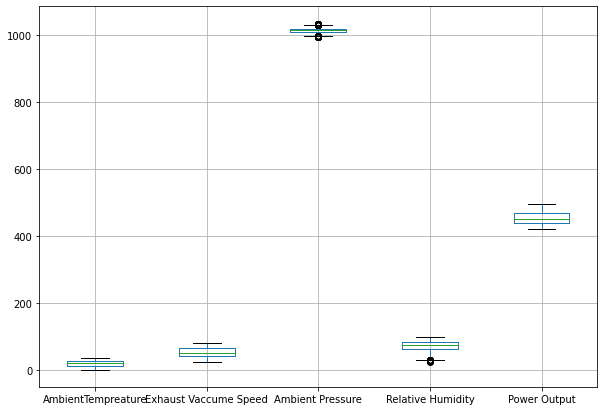

In [12]:
plt.figure(figsize=(10,7))
df.boxplot()

In [ ]:
#Bivariate Analysis

Text(0.5, 1.0, 'Scatter plot of AmbientTempreature and Power Output')

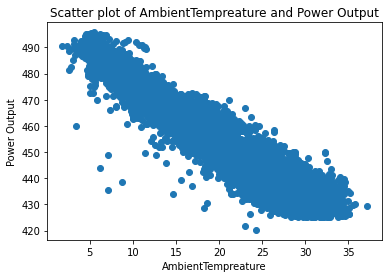

In [ ]:
plt.scatter(df['AmbientTempreature'],df['Power Output'])
plt.xlabel('AmbientTempreature')
plt.ylabel('Power Output')
plt.title('Scatter plot of AmbientTempreature and Power Output')


Text(0.5, 1.0, 'Scatter plot of Exhaust Vaccume Speed and Power Output')

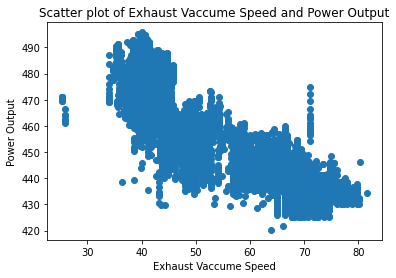

In [ ]:
plt.scatter(df['Exhaust Vaccume Speed'],df['Power Output'])
plt.xlabel('Exhaust Vaccume Speed')
plt.ylabel('Power Output')
plt.title('Scatter plot of Exhaust Vaccume Speed and Power Output')


Text(0.5, 1.0, 'Scatter plot of Ambient Pressure and Power Output')

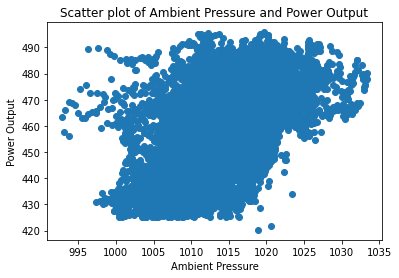

In [ ]:
plt.scatter(df['Ambient Pressure'],df['Power Output'])
plt.xlabel('Ambient Pressure')
plt.ylabel('Power Output')
plt.title('Scatter plot of Ambient Pressure and Power Output')



Text(0.5, 1.0, 'Scatter plot of Relative Humidity and Power Output')

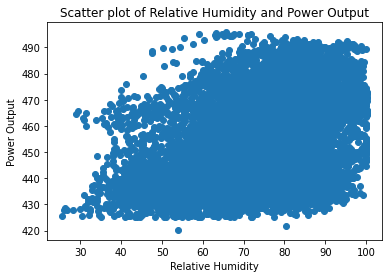

In [ ]:
plt.scatter(df['Relative Humidity'],df['Power Output'])
plt.xlabel('Relative Humidity')
plt.ylabel('Power Output')
plt.title('Scatter plot of Relative Humidity and Power Output')


In [ ]:
#Correlations amongs the features

In [ ]:
df.corr()

,AmbientTempreature,Exhaust Vaccume Speed,Ambient Pressure,Relative Humidity,Power Output
AmbientTempreature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
Exhaust Vaccume Speed,0.844107,1.000000,-0.413502,-0.312187,-0.869780
Ambient Pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
Relative Humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
Power Output,-0.948128,-0.869780,0.518429,0.389794,1.000000


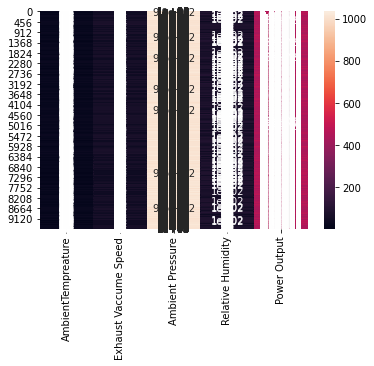

In [ ]:
sns.heatmap(df,annot=True)

In [ ]:
#Multivariate analysis

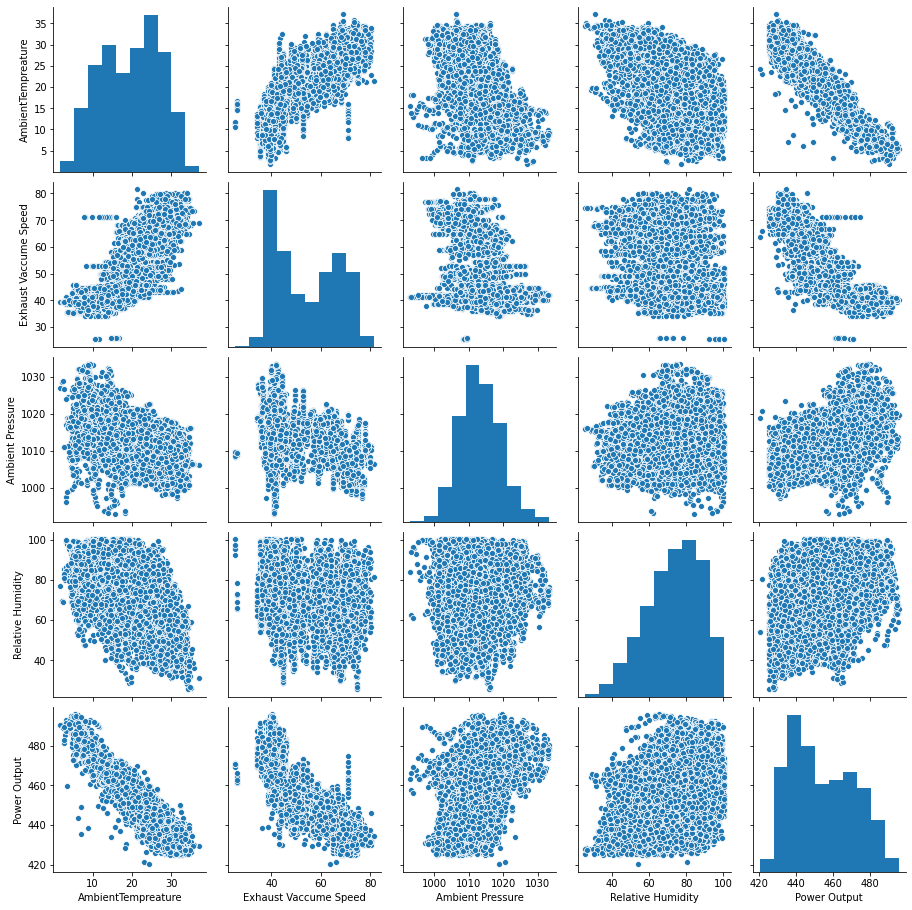

In [ ]:
sns.pairplot(df)

In [ ]:
x=df.drop(['Power Output'],axis='columns')

In [ ]:
y=df['Power Output']

In [ ]:
#Spliting the data into training and testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#Preprocessing the data Of training And testing

In [ ]:
std=StandardScaler()
x_train=std.fit_transform(x_train)

In [ ]:
x_test=std.fit_transform(x_test)

In [ ]:
#Model buliding

**Linear Regression**

In [ ]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr=model1.predict(x_test)

In [ ]:
mean_squared_error_lr=metrics.mean_squared_error(y_pred_lr,y_test)
mean_squared_error_lr


19.596846921846222

In [ ]:
mean_absolute_error_lr=metrics.mean_absolute_error(y_test,y_pred_lr)
mean_absolute_error_lr

3.5487236686166375

In [ ]:
RMSE_lr=np.sqrt(mean_squared_error_lr)
RMSE_lr

4.426832606034051

**Ridge Regression**

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-1,1e-2,1,5,10,20,30,35,40]}
model2=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
model2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.1, 0.01, 1, 5, 10, 20, 30,
                                   35, 40]},
             scoring='neg_mean_squared_error')

In [ ]:
model2.best_score_

-21.118308479350592

In [ ]:
model2.best_params_

{'alpha': 0.01}

In [ ]:
y_pred_rr=model2.predict(x_test)

In [ ]:
mean_squared_error_rr=metrics.mean_squared_error(y_pred_rr,y_test)
mean_squared_error_rr


19.596828009725257

In [ ]:
mean_absolute_error_rr=metrics.mean_absolute_error(y_test,y_pred_rr)
mean_absolute_error_rr

3.54872300678007

In [ ]:
RMSE_rr=np.sqrt(mean_squared_error_rr)
RMSE_rr

4.426830469955367

**Lasso Regression**

In [ ]:
lasso=Lasso()
parameteres={'alpha':[1e-15,1e-10,1e-1,1e-2,1,5,10,20,30,35,40]}
model3=RandomizedSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
model3.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28607.148401564882, tolerance: 201.3459972060569
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33329.79604718892, tolerance: 202.67170640905343
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39513.87034099583, tolerance: 202.35744740103928
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34234.177

RandomizedSearchCV(cv=10, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 0.1, 0.01, 1, 5,
                                                  10, 20, 30, 35, 40]},
                   scoring='neg_mean_squared_error')

In [ ]:

model3.best_score_

-21.106834142549214

In [ ]:
model3.best_params_

{'alpha': 1e-15}

In [ ]:
y_pred_LR=model3.predict(x_test)
y_pred_LR

array([453.78697401, 474.42588348, 481.31623871, ..., 440.14477795,
       434.47683837, 479.54387334])

In [ ]:
mean_squared_error_LR=metrics.mean_squared_error(y_pred_LR,y_test)
mean_squared_error_LR


19.596846921846222

In [ ]:
mean_absolute_error_LR=metrics.mean_absolute_error(y_test,y_pred_LR)
mean_absolute_error_LR

3.548723668616638

In [ ]:
RMSE_LR=np.sqrt(mean_squared_error_LR)
RMSE_LR

4.426832606034051

**Decision Tree Regressor**

In [ ]:
dr=DecisionTreeRegressor()
parameters={'max_depth':[1,2,3,4,5,6,7,8,9,10,20,23,50,100],'max_features':['auto','sqrt','log2'],'max_depth':[1,2,3,4,5,6,7],'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,20,23,50,100],'min_samples_split':[1,2,5,6,9,10]}
model4=RandomizedSearchCV(dr,parameters,scoring='neg_mean_squared_error',cv=10)
model4.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 20, 23, 50,
                                                           100],
                                        'min_samples_split': [1, 2, 5, 6, 9,
                                                              10]},
                   scoring='neg_mean_squared_error')

In [ ]:
model4.best_score_

-17.7798722499718

In [ ]:
model4.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 100,
 'min_samples_split': 6}

In [ ]:
y_pred_dtr=model4.predict(x_test)
y_pred_dtr

array([448.87291667, 477.60546243, 485.23737991, ..., 440.81533333,
       434.44913669, 482.65457399])

In [ ]:
mean_squared_error_dtr=metrics.mean_squared_error(y_pred_dtr,y_test)
mean_squared_error_dtr


16.388722574981205

In [ ]:
mean_absolute_error_dtr=metrics.mean_absolute_error(y_test,y_pred_dtr)
mean_absolute_error_dtr

3.1159296424860448

In [ ]:
RMSE_dtr=np.sqrt(mean_squared_error_dtr)
RMSE_dtr

4.048298726005926

**Random Forest Regressor**

In [ ]:
rfr=RandomForestRegressor()
parameters={'n_estimators':[50,100,500,800,1000,1500,],'max_depth':[1,2,3,4,5,6,7,8,9,10,20,23,50,100],'max_features':['auto','sqrt','log2'],'max_depth':[1,2,3,4,5,6,7],'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,20,23,50,100],'min_samples_split':[1,2,5,6,9,10]}
model5=RandomizedSearchCV(rfr,parameters,scoring='neg_mean_squared_error',cv=10)
model5.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.6/dist-packages/jobli

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 20, 23, 50,
                                                           100],
                                        'min_samples_split': [1, 2, 5, 6, 9,
                                                              10],
                                        'n_estimators': [50, 100, 500, 800,
                                                         1000, 1500]},
                   scoring='neg_mean_squared_error')

In [ ]:
filename='Combine_Cycle_Power_Plant_model5.pkl'
pickle.dump(model5,open(filename,'wb'))


In [ ]:
model5.best_score_

-20.187854184688053

In [ ]:
model5.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_split': 6,
 'n_estimators': 1500}

In [ ]:
y_pred_rfr=model5.predict(x_test)
y_pred_rfr

array([452.54809809, 476.60630028, 485.67463915, ..., 443.93807234,
       434.0481778 , 481.6591205 ])

In [ ]:
mean_squared_error_rfr=metrics.mean_squared_error(y_pred_rfr,y_test)
mean_squared_error_rfr


18.704045887427583

In [ ]:
mean_absolute_error_rfr=metrics.mean_absolute_error(y_test,y_pred_rfr)
mean_absolute_error_rfr

3.3382449275122354

In [ ]:
RMSE_rfr=np.sqrt(mean_squared_error_rfr)
RMSE_rfr

4.324817439780271

**Graph between Regression models and mean_absolute_error**

<BarContainer object of 5 artists>

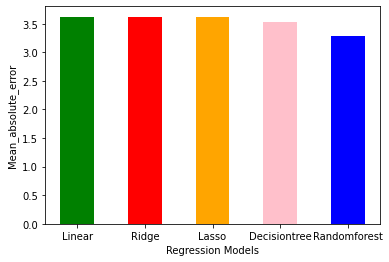

In [ ]:
Regression_Models=['Linear','Ridge','Lasso','Decisiontree','Randomforest']
Mean_absolute_error=[3.622311390139669,3.622311390139669,3.6222556671208697,3.5220765061387724,3.293564628710395]
plt.xlabel('Regression Models')
plt.ylabel('Mean_absolute_error')
plt.bar(Regression_Models,Mean_absolute_error,width=0.5,color=['green','red','orange','pink','blue'])

